In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import scipy.spatial as spatial
import mplcursors

%matplotlib notebook


<IPython.core.display.Javascript object>


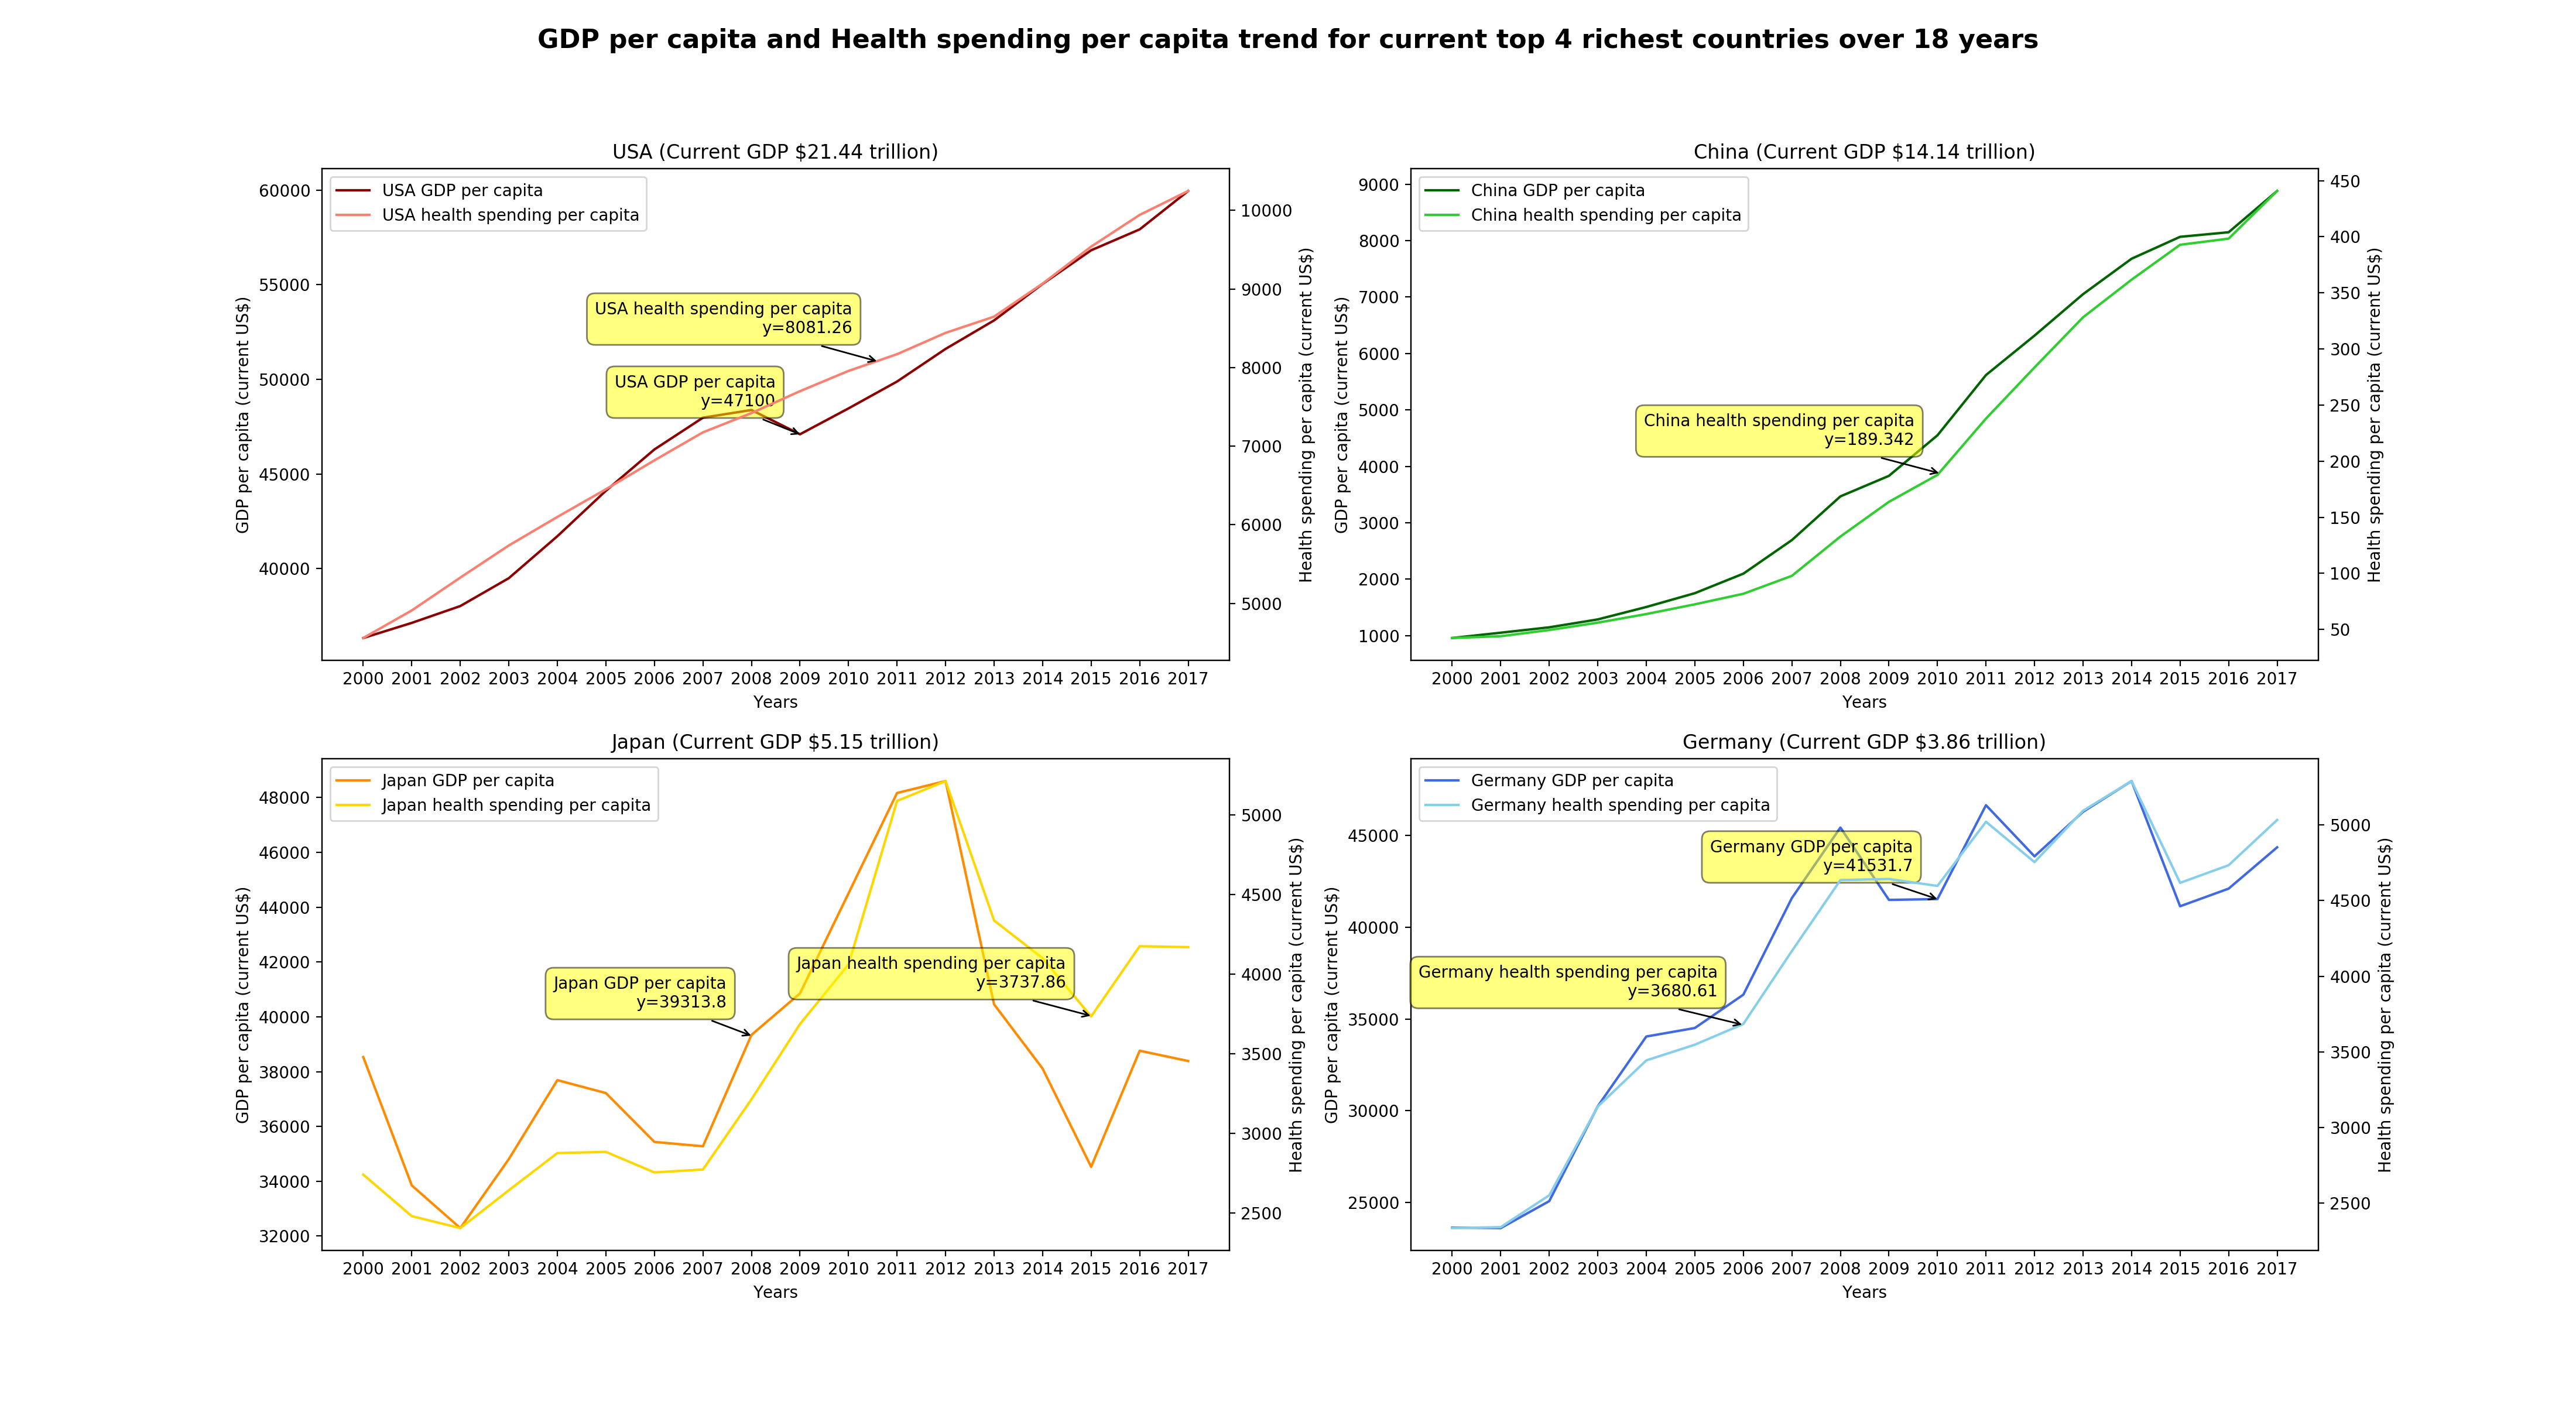

In [7]:
columns = [i for i in range(44,64)]
df_usa = pd.read_excel("data/API_USA_DS2_en_excel_v2_1562905.xls", skiprows = 3, usecols=columns, error_bad_lines=False)
df_usa = df_usa[df_usa.index.isin([884, 569])]
df_usa = df_usa.T
df_usa = df_usa.dropna()
df_usa.columns = ['USA_Hlth_PC', 'USA_GDP_PC']

df_china = pd.read_excel("data/API_CHN_DS2_en_excel_v2_1622782.xls", skiprows = 3, usecols=columns, error_bad_lines=False)
df_china = df_china[df_china.index.isin([1029, 1160])]
df_china = df_china.T
df_china = df_china.dropna()
df_china.columns = ['China_GDP_PC', 'China_Hlth_PC']

df_japan = pd.read_excel("data/API_JPN_DS2_en_excel_v2_1624126.xls", skiprows = 3, usecols=columns, error_bad_lines=False)
df_japan = df_japan[df_japan.index.isin([80, 1272])]
df_japan = df_japan.T
df_japan = df_japan.dropna()
df_japan.columns = ['JPN_Hlth_PC','JPN_GDP_PC']

df_DEU = pd.read_excel("data/API_DEU_DS2_en_excel_v2_1622829.xls", skiprows = 3, usecols=columns, error_bad_lines=False)
df_DEU = df_DEU[df_DEU.index.isin([444, 820])]
df_DEU = df_DEU.T
df_DEU = df_DEU.dropna()
df_DEU.columns = ['DEU_GDP_PC','DEU_Hlth_PC']

df_all = pd.merge(df_usa, df_china, left_index=True, right_index=True)
df_all = pd.merge(df_all, df_japan, left_index=True, right_index=True)
df_all = pd.merge(df_all, df_DEU, left_index=True, right_index=True)
df_all.index.name = 'Year'


fig = plt.figure(figsize=(22,12))

fig.suptitle("GDP per capita and Health spending per capita trend for current top 4 richest countries over 18 years", fontsize=16, fontweight="bold")


def two_scales(ax1, year, data1, data2, c1, c2, country, GDP):
    ax2 = ax1.twinx()
    lns1 = ax1.plot(year, data1, c1, label=country+' GDP per capita')
    mplcursors.cursor(lns1)
    ax1.set_xlabel('Years')
    ax1.set_ylabel('GDP per capita (current US$)')
    #ax1.xaxis.set_major_locator(plt.MaxNLocator(9))
    lns2 = ax2.plot(year, data2, c2, label=country+' health spending per capita')
    mplcursors.cursor(lns2)
    ax2.set_ylabel('Health spending per capita (current US$)')
    #ax2.xaxis.set_major_locator(plt.MaxNLocator(9))
    lns = lns1+lns2
    labs = [l.get_label() for l in lns]
    ax1.legend(lns, labs, loc=0)
    plt.title(country+' '+GDP)
    return ax1, ax2


ax = plt.subplot(2,2,1)
ax1, ax1a = two_scales(ax, df_all.index, df_all['USA_GDP_PC'], df_all['USA_Hlth_PC'], 'darkred', 'salmon', 'USA','(Current GDP $21.44 trillion)')


ax = plt.subplot(2,2,2)
ax2, ax2a = two_scales(ax, df_all.index, df_all['China_GDP_PC'], df_all['China_Hlth_PC'], 'darkgreen', 'limegreen', 'China', '(Current GDP $14.14 trillion)')

ax = plt.subplot(2,2,3)
ax3, ax3a = two_scales(ax, df_all.index, df_all['JPN_GDP_PC'], df_all['JPN_Hlth_PC'], 'darkorange', 'gold', 'Japan', '(Current GDP $5.15 trillion)')


ax = plt.subplot(2,2,4)
ax4, ax4a = two_scales(ax, df_all.index, df_all['DEU_GDP_PC'], df_all['DEU_Hlth_PC'], 'royalblue', 'skyblue', 'Germany', '(Current GDP $3.86 trillion)')

#fig.tight_layout()

plt.show()

plt.savefig('assignment_4.png')


